In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
raw_data = pd.read_csv('2.02. Binary predictors.csv')

In [5]:
raw_data.isnull().sum()

SAT         0
Admitted    0
Gender      0
dtype: int64

In [6]:
data = raw_data.copy()

In [7]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data

,SAT,Admitted,Gender
0,1363,0,1
1,1792,1,0
2,1954,1,0
3,1653,0,1
4,1593,0,1
...,...,...,...
163,1722,1,0
164,1750,1,1
165,1555,0,1
166,1524,0,1


In [8]:
x = data[['SAT','Gender']]
y = data['Admitted']

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(x)

StandardScaler()

In [13]:
x_scaled = scaler.transform(x)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(1)

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred = knn.predict(x_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[17  3]
 [ 2 29]]


              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.91      0.94      0.92        31

    accuracy                           0.90        51
   macro avg       0.90      0.89      0.90        51
weighted avg       0.90      0.90      0.90        51



In [35]:
#Number of neighbors
error_rate = []
for i in range(1,5):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

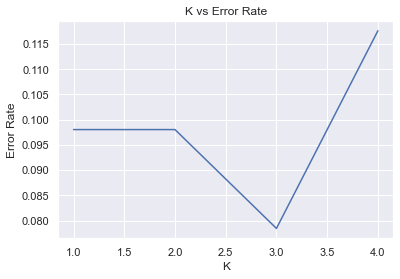

In [36]:
plt.plot(range(1,5), error_rate)
plt.title('K vs Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
pre = knn.predict(x_test)
print(confusion_matrix(y_test, pre))
print('\n')
print(classification_report(y_test, pre))

[[20  0]
 [ 4 27]]


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.87      0.93        31

    accuracy                           0.92        51
   macro avg       0.92      0.94      0.92        51
weighted avg       0.93      0.92      0.92        51

